# Implementation PowerTranfomer using Sales dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Sales.csv")

In [3]:
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27-06-10,159.42,2533654.00,951410.50,NaN,NaN
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15-09-12,117.11,576782.80,248406.36,NaN,NaN
2,Europe,Russia,Office Supplies,Offline,L,05-08-14,524.96,1158502.59,224598.75,NaN,NaN
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07-05-14,6.92,75591.66,19525.82,NaN,NaN
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02-06-13,524.96,3296425.02,639077.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,Online,M,09-03-11,35.84,97040.64,65214.72,NaN,NaN
96,Asia,Malaysia,Fruits,Offline,L,28-12-11,6.92,58471.11,15103.47,NaN,NaN
97,Sub_Saharan Africa,Sierra Leone,Vegetables,Offline,C,29-06-16,90.93,228779.10,93748.05,NaN,NaN
98,North America,Mexico,Personal Care,Offline,M,08-08-15,56.67,471336.91,144521.02,NaN,NaN


# Applying Feature Engineering 

In [4]:
from sklearn.preprocessing import LabelEncoder , PowerTransformer 

In [5]:
le=LabelEncoder()

In [6]:
df['Sales_Channel']=le.fit_transform(df['Sales_Channel'])

In [7]:
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
0,Australia and Oceania,Tuvalu,Baby Food,0,H,27-06-10,159.42,2533654.00,951410.50,NaN,NaN
1,Central America and the Caribbean,Grenada,Cereal,1,C,15-09-12,117.11,576782.80,248406.36,NaN,NaN
2,Europe,Russia,Office Supplies,0,L,05-08-14,524.96,1158502.59,224598.75,NaN,NaN
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,1,C,07-05-14,6.92,75591.66,19525.82,NaN,NaN
4,Sub_Saharan Africa,Rwanda,Office Supplies,0,L,02-06-13,524.96,3296425.02,639077.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,1,M,09-03-11,35.84,97040.64,65214.72,NaN,NaN
96,Asia,Malaysia,Fruits,0,L,28-12-11,6.92,58471.11,15103.47,NaN,NaN
97,Sub_Saharan Africa,Sierra Leone,Vegetables,0,C,29-06-16,90.93,228779.10,93748.05,NaN,NaN
98,North America,Mexico,Personal Care,0,M,08-08-15,56.67,471336.91,144521.02,NaN,NaN


In [8]:
df.drop(['Item_Type','Item_Type','Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

In [9]:
df.drop(['Region','Country'],axis=1,inplace=True)

In [10]:
df.drop(['Ship_Date'],axis=1,inplace=True)

In [11]:
df

,Sales_Channel,Order_Priority,Unit_Cost,Total_Revenue,Total_Profit
0,0,H,159.42,2533654.00,951410.50
1,1,C,117.11,576782.80,248406.36
2,0,L,524.96,1158502.59,224598.75
3,1,C,6.92,75591.66,19525.82
4,0,L,524.96,3296425.02,639077.50
...,...,...,...,...,...
95,1,M,35.84,97040.64,65214.72
96,0,L,6.92,58471.11,15103.47
97,0,C,90.93,228779.10,93748.05
98,0,M,56.67,471336.91,144521.02


In [12]:
df=pd.get_dummies(df,columns=['Order_Priority'],drop_first=True,sparse=False)

<ipython-input-14-dd82123f838a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Profit'])


<Axes: xlabel='Total_Profit', ylabel='Density'>

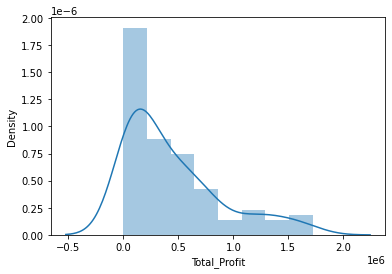

In [14]:
import seaborn as sns
sns.distplot(df['Total_Profit'])

This data is right skew due to this our accuracy points will be decrease so we have to solve that issue

In [15]:
df

,Sales_Channel,Unit_Cost,Total_Revenue,Total_Profit,Order_Priority_H,Order_Priority_L,Order_Priority_M
0,0,159.42,2533654.00,951410.50,1,0,0
1,1,117.11,576782.80,248406.36,0,0,0
2,0,524.96,1158502.59,224598.75,0,1,0
3,1,6.92,75591.66,19525.82,0,0,0
4,0,524.96,3296425.02,639077.50,0,1,0
...,...,...,...,...,...,...,...
95,1,35.84,97040.64,65214.72,0,0,1
96,0,6.92,58471.11,15103.47,0,1,0
97,0,90.93,228779.10,93748.05,0,0,0
98,0,56.67,471336.91,144521.02,0,0,1


In [16]:
pt=PowerTransformer(method="yeo-johnson")

In [17]:
df["Total_Profit"]=pt.fit_transform(df[["Total_Profit"]])

In [18]:
df

,Sales_Channel,Unit_Cost,Total_Revenue,Total_Profit,Order_Priority_H,Order_Priority_L,Order_Priority_M
0,0,159.42,2533654.00,1.153936,1,0,0
1,1,117.11,576782.80,-0.105731,0,0,0
2,0,524.96,1158502.59,-0.181550,0,1,0
3,1,6.92,75591.66,-1.470422,0,0,0
4,0,524.96,3296425.02,0.727177,0,1,0
...,...,...,...,...,...,...,...
95,1,35.84,97040.64,-0.949194,0,0,1
96,0,6.92,58471.11,-1.559348,0,1,0
97,0,90.93,228779.10,-0.752257,0,0,0
98,0,56.67,471336.91,-0.487967,0,0,1


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-20-5a5808e4c440>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Profit'])


<Axes: xlabel='Total_Profit', ylabel='Density'>

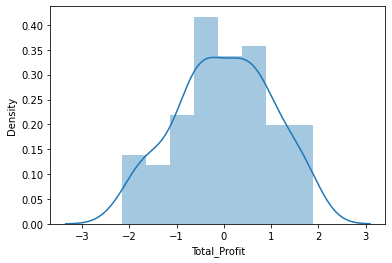

In [20]:
sns.distplot(df['Total_Profit'])

 By the power tranformer we did mean centring of data 

# Splitting Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Total_Profit'],axis=1),df["Total_Profit"],test_size=0.3,random_state=42)

In [23]:
x_train

,Sales_Channel,Unit_Cost,Total_Revenue,Order_Priority_H,Order_Priority_L,Order_Priority_M
11,0,35.84,455479.04,1,0,0
47,1,56.67,22312.29,0,0,1
85,0,56.67,524870.06,0,1,0
28,0,31.79,243133.80,0,0,0
93,1,263.33,3458252.00,1,0,0
...,...,...,...,...,...,...
60,0,117.11,140287.40,1,0,0
71,1,6.92,6279.09,0,1,0
14,0,56.67,400558.73,0,0,0
92,1,524.96,1316095.41,0,0,1


In [24]:
y_train

11    0.058821
47   -1.794596
85   -0.416850
28   -0.839271
93    1.596595
        ...   
60   -0.988018
71   -2.103431
14   -0.591319
92   -0.085187
51   -1.407619
Name: Total_Profit, Length: 70, dtype: float64

In [25]:
x_train_transfom=pt.fit_transform(x_train)

In [26]:
x_test_transfom=pt.transform(x_test)

In [27]:
x_test_transfom

array([[ 1.02899151, -0.15714695, -0.21733106, -0.63245553,  1.63835604,
        -0.5       ],
       [-0.97182532,  1.42835355,  0.84671393, -0.63245553, -0.61036794,
         2.        ],
       [ 1.02899151,  1.42835355,  1.21989709, -0.63245553, -0.61036794,
         2.        ],
       [-0.97182532, -0.00884562, -0.92807129,  1.58113883, -0.61036794,
        -0.5       ],
       [ 1.02899151, -0.87227206, -0.18963828,  1.58113883, -0.61036794,
        -0.5       ],
       [ 1.02899151,  1.42835355,  0.98628344, -0.63245553, -0.61036794,
         2.        ],
       [ 1.02899151, -0.15714695, -0.61782859, -0.63245553,  1.63835604,
        -0.5       ],
       [-0.97182532,  1.38022904,  1.13804728, -0.63245553,  1.63835604,
        -0.5       ],
       [ 1.02899151, -0.21149718, -1.89312815,  1.58113883, -0.61036794,
        -0.5       ],
       [-0.97182532,  0.25261425,  0.96201751,  1.58113883, -0.61036794,
        -0.5       ],
       [-0.97182532,  1.38022904,  0.97206187, -0.

# Model Building using linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
l=LinearRegression()

In [30]:
y_train

11    0.058821
47   -1.794596
85   -0.416850
28   -0.839271
93    1.596595
        ...   
60   -0.988018
71   -2.103431
14   -0.591319
92   -0.085187
51   -1.407619
Name: Total_Profit, Length: 70, dtype: float64

In [31]:
l.fit(x_train, y_train)

LinearRegression()

In [32]:
x_train_transfom

array([[-9.71825316e-01, -8.72272060e-01, -4.31330930e-01,
         1.58113883e+00, -6.10367938e-01, -5.00000000e-01],
       [ 1.02899151e+00, -5.63169622e-01, -1.84435572e+00,
        -6.32455532e-01, -6.10367938e-01,  2.00000000e+00],
       [-9.71825316e-01, -5.63169622e-01, -3.36565658e-01,
        -6.32455532e-01,  1.63835604e+00, -5.00000000e-01],
       [-9.71825316e-01, -9.48264931e-01, -8.14394148e-01,
        -6.32455532e-01, -6.10367938e-01, -5.00000000e-01],
       [ 1.02899151e+00,  7.14106278e-01,  1.28154320e+00,
         1.58113883e+00, -6.10367938e-01, -5.00000000e-01],
       [ 1.02899151e+00,  2.52614247e-01, -7.43125313e-02,
        -6.32455532e-01, -6.10367938e-01, -5.00000000e-01],
       [-9.71825316e-01, -5.63169622e-01, -1.26271153e-01,
        -6.32455532e-01,  1.63835604e+00, -5.00000000e-01],
       [-9.71825316e-01,  7.14106278e-01,  7.14369822e-01,
         1.58113883e+00, -6.10367938e-01, -5.00000000e-01],
       [-9.71825316e-01, -5.63169622e-01, -3.379

In [33]:
y_pred=l.predict(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error


In [35]:
mean_absolute_error(y_test,y_pred)

0.42925092027103223

In [36]:
mean_squared_error(y_test,y_pred)

0.3222581680077639

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_score(y_test,y_pred)

0.6644180440767804